In [5]:
import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

2024-12-04 08:42:43.762330: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-04 08:42:43.766515: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 08:42:43.783906: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 08:42:43.797626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733276563.811229    5033 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733276563.81

In [61]:
data = pd.read_csv("./risk_factors_cervical_cancer.csv")

In [62]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [63]:
from sklearn.model_selection import train_test_split

In [74]:
X = data.drop(columns=["Hinselmann", "Schiller", "Citology", "Biopsy"])
y = data[["Hinselmann", "Schiller", "Citology", "Biopsy"]]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 16  

In [43]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=X_train.shape[1],
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# train the parameters
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 4), output.shape=(None, 1)

In [31]:
from jcopml.plot import plot_missing_value

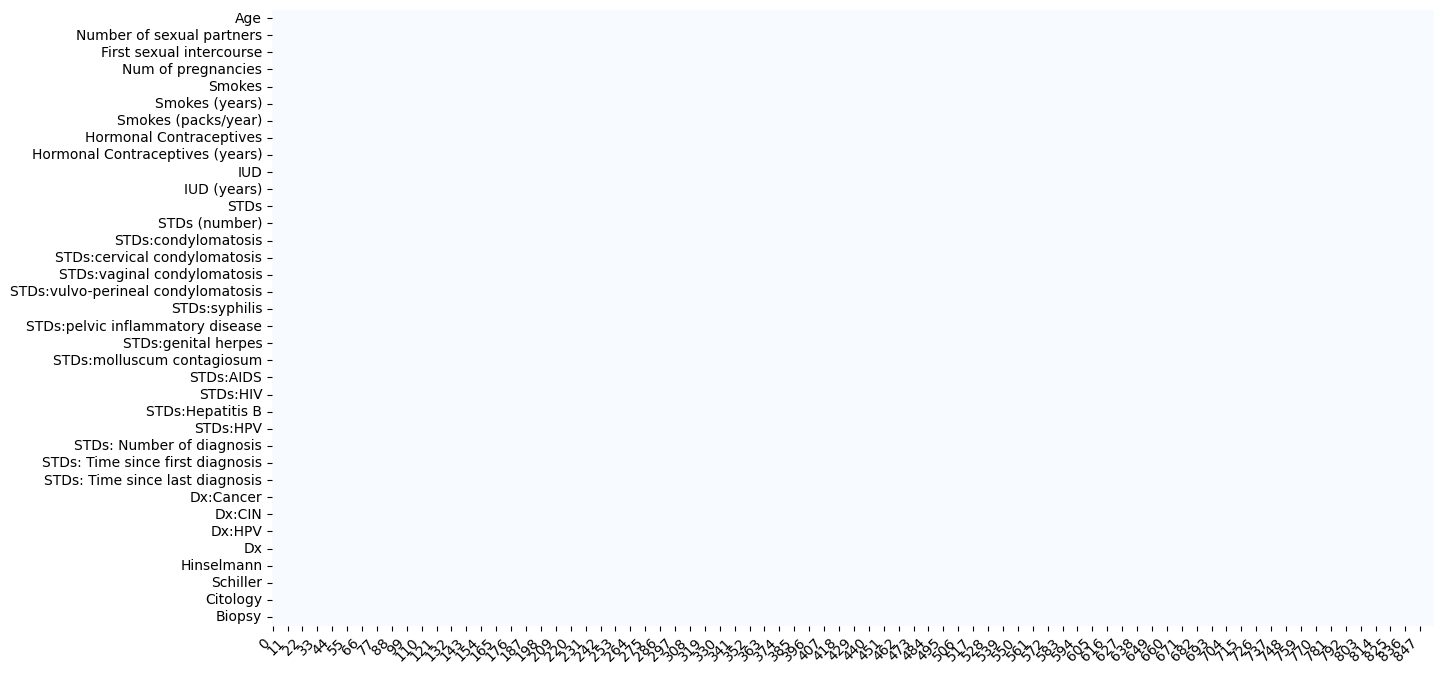

In [32]:
plot_missing_value(data)

In [65]:
for d in data.columns:
    data[d] = data[d].apply(lambda x: None if x == "?" else x)

,missing_value,%
Age,0,0.00
Number of sexual partners,23,3.35
First sexual intercourse,7,1.02
Num of pregnancies,44,6.41
Smokes,11,1.60
Smokes (years),11,1.60
Smokes (packs/year),11,1.60
Hormonal Contraceptives,88,12.83
Hormonal Contraceptives (years),88,12.83
IUD,98,14.29


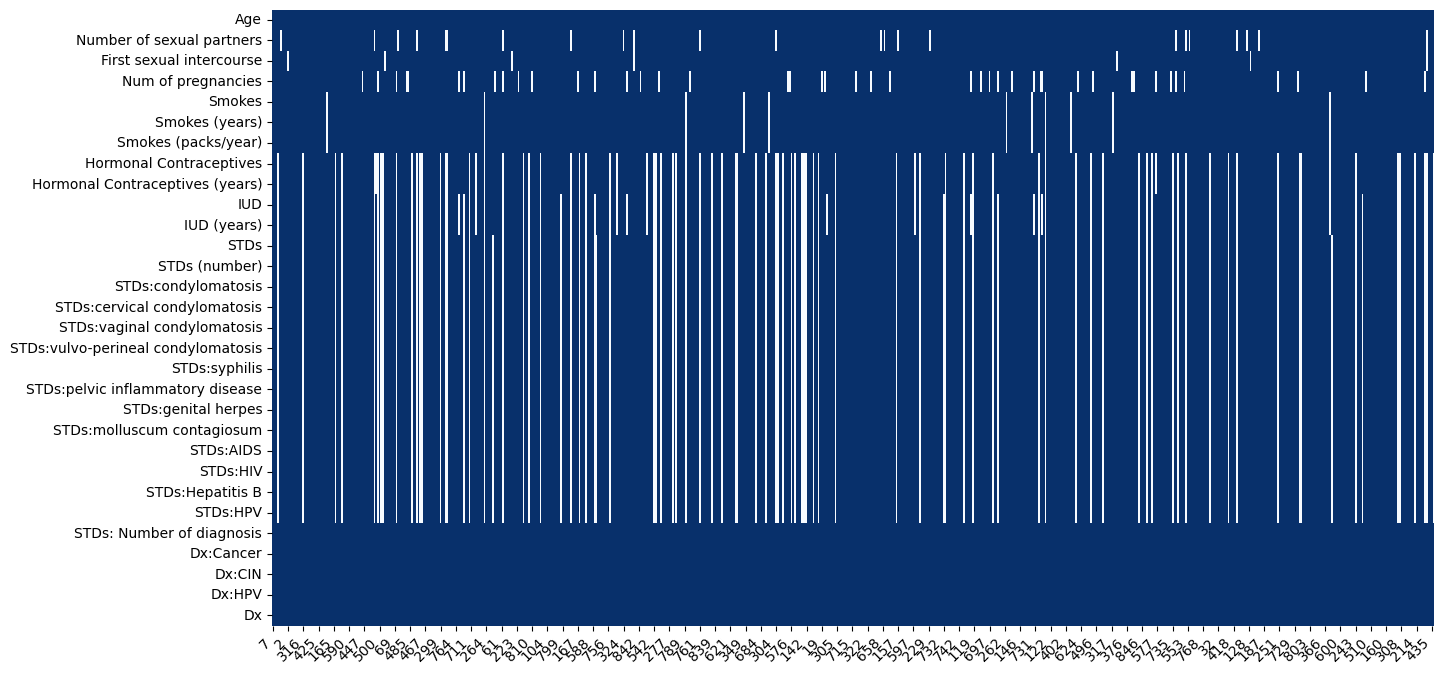

In [45]:
plot_missing_value(X_train, return_df=True)

In [66]:
data.drop(columns=["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"], inplace=True)

In [67]:
from sklearn.impute import SimpleImputer

In [68]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [72]:
imputer = SimpleImputer(strategy='median')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

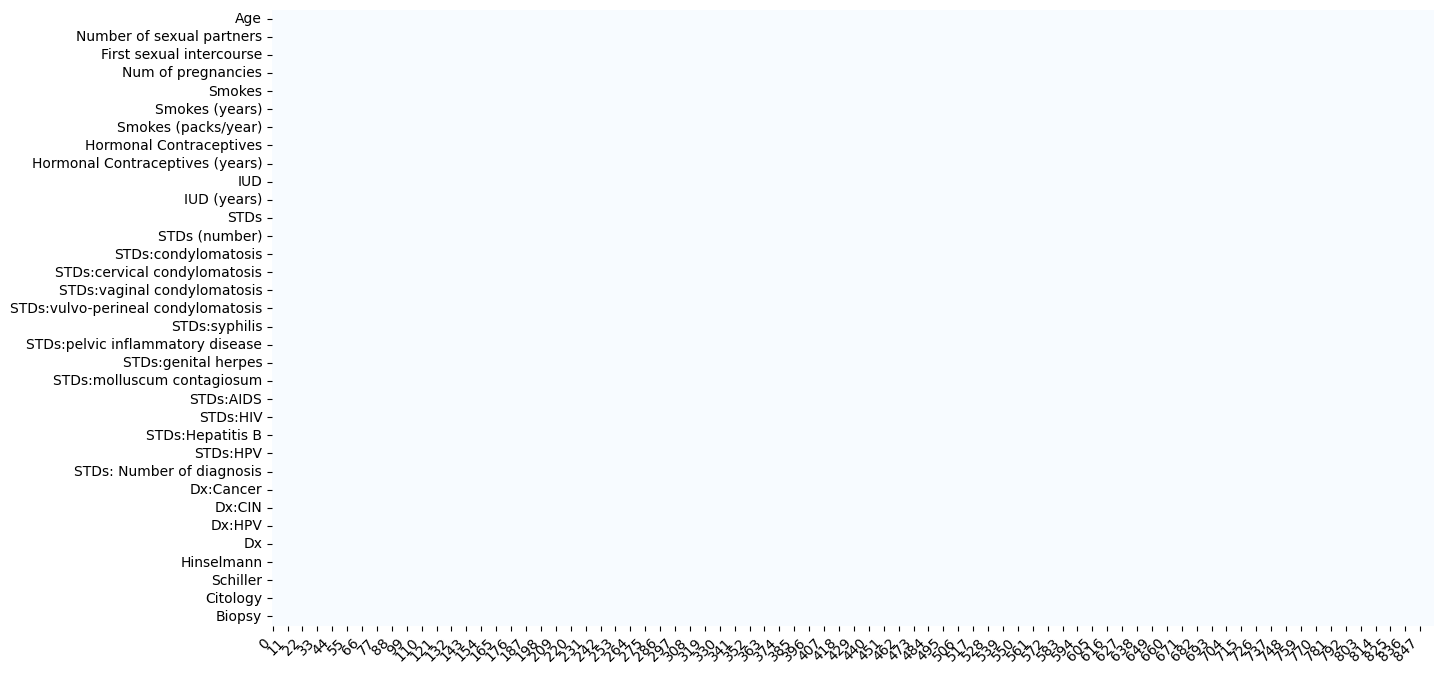

In [73]:
plot_missing_value(data)

Epoch 1/10


/home/zaens/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0051 - loss: 4.4254      
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0032 - loss: 1.3568     
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0287 - loss: 0.2957 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0812 - loss: 0.2799 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0903 - loss: 0.2857 
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0774 - loss: 0.2439 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0386 - loss: 0.2424     
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0556 - loss: 0.2698 
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0276 - loss: 0.2056     
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0585 - loss: 0.2492     
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0519 - loss: 0.2194 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0290 - loss: 0

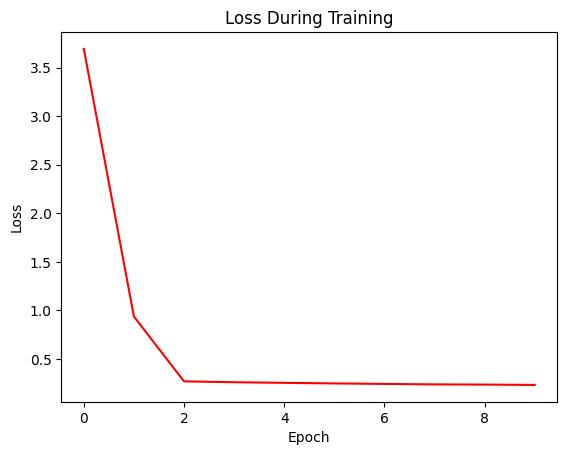

In [76]:
hidden_units = 64
activation = 'relu'

# Bangun model Sequential
model = models.Sequential()

# Tambahkan hidden layer
model.add(layers.Dense(input_dim=X_train.shape[1],
                       units=hidden_units, 
                       activation=activation))

# Tambahkan output layer (units sesuai jumlah label)
model.add(layers.Dense(units=y_train.shape[1],  # Jumlah label
                       activation='sigmoid'))  # Sigmoid untuk multi-label

# Kompilasi model dengan binary_crossentropy untuk multi-label
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluasi akurasi
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

# Plotkan loss selama training
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((686, 30), (686, 30), (686, 4), (172, 4))